### New muons

We need to check first have many more we recieved, and then check if the maximum window for these new muons is bigger than the one used already to create the models.

In [1]:
#Ahora que se han cambiado de directorio las imágenes:
import os.path
path = '/gpfs/projects/damic/new_mu/'
num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
print('In total, there are', num_files,'files')

import glob
num_electrons = len(glob.glob1(path,"*11.npz"))
num_alphas = len(glob.glob1(path,"*1000020040.npz"))
num_gammas = len(glob.glob1(path,"*_pdg_22.npz"))
num_muons = len(glob.glob1(path,"*13.npz"))

print('There are',num_electrons,'electrons,',num_alphas,'alphas,', num_muons,'muons and',num_gammas,'gammas')

In total, there are 2080 files
There are 0 electrons, 0 alphas, 2080 muons and 0 gammas


In [2]:
import matplotlib.pyplot as plt
import numpy as np

Now we proceed to crop the tracks of the muons and calculate the maximum window:

In [ ]:
#destination directory 
dest = path

#initializing size of the maximum window
#window_x: horizontal dimension, window_y: vertical dimension
window_x, window_y = 0, 0

#list of the files in the original dataset
files = os.listdir(path)

#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(path, files[index]))['energy']
    noise_a = np.load(os.path.join(path, files[index]))['noise']
    
    #cropping energy images 
    coords = np.argwhere(energy_a) #coordinates of non zero elements in the array
    y_min, x_min = coords.min(axis=0) #coordinates of the element located more on the left and more on the top
    y_max, x_max = coords.max(axis=0) #coordinates of the element located more on the right and more on the bottom
    energy_b = energy_a[y_min:y_max+1, x_min:x_max+1]
    
    #definig the shape of the maximum window
    #we need to add 1 because python starts with row and column 0
    if (x_max-x_min+1) > window_x:
        window_x = x_max-x_min+1
    if (y_max-y_min+1) > window_y:
        window_y = y_max-y_min+1
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_b, noise=noise_a)
    print(index)

In [4]:
print("The window will have size",window_x,"x",window_y)

The window will have size 295 x 274


In [5]:
#once all the figures are cropped, all of them must have the same size which will correspond to the 
#maxium window shape calculated before

window_x, window_y = 295, 274

#this function will be only applied to the energy of the particle, not the noise
def padding_energy(array):
    
    y, x = window_y, window_x  #y,x is the size of the maximum window
    y_image = array.shape[0]
    x_image = array.shape[1]
    
    if y-y_image == 0:
        reshaped = np.pad(array, ((y-y_image, 0), (x-x_image, 0)),  constant_values=0)
    elif x-x_image == 0:
        reshaped = np.pad(array, ((y-y_image, 0), (x-x_image, 0)),  constant_values=0)
    else:
        #generating random numbers to pad the energy image
        random1 = np.random.randint(0, y-y_image)
        random2 = np.random.randint(0, x-x_image)
    
        #padding
        reshaped = np.pad(array, ((random1, y-y_image-random1), (random2, x-x_image-random2)),  constant_values=0)
    return reshaped

#this function will be applied to the noise of the signal to crop the image
def cropping_noise(array):
    
    y, x = window_y, window_x
    reshaped = array[0:window_y, 0:window_x]
    return reshaped

In [ ]:
#reshaping both energy and noise images, so they can be the same size

#list of the files in the original dataset
files = os.listdir(dest)
print(len(files))
#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(dest, files[index]))['energy'] 
    noise_a = np.load(os.path.join(dest, files[index]))['noise']
    
    #padding energy images
    energy_a = padding_energy(energy_a)
    
    #cropping noise images
    noise_a = cropping_noise(noise_a)
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_a, noise=noise_a)
    print(index)

Now we will see the original picture:

In [7]:
original_dataset_dir = '/gpfs/res_scratch/damic/TFM_DM/simulations/extra_muons/muons/'

Text(0.5, 1.0, 'Muon energy')

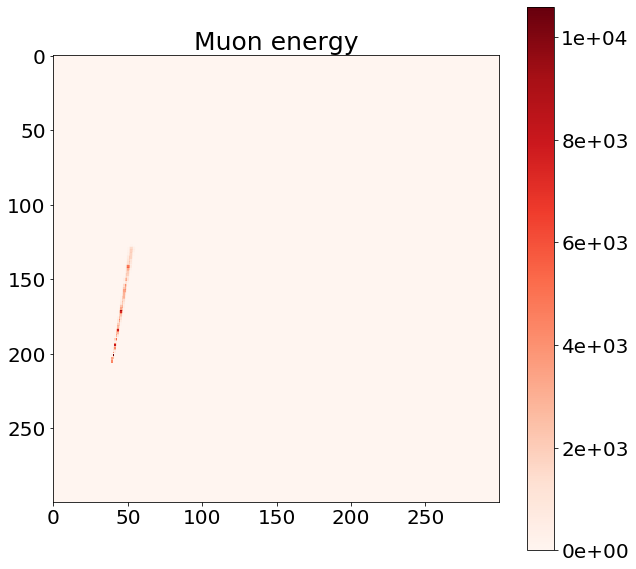

In [8]:
files_original = os.listdir(original_dataset_dir)
e = np.load(os.path.join(original_dataset_dir, files_original[1000]))['energy']
n = np.load(os.path.join(original_dataset_dir, files_original[1000]))['noise']

fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Muon energy", fontsize = 25)

In [13]:
e.shape

(300, 300)

Text(0.5, 1.0, 'Muon track')

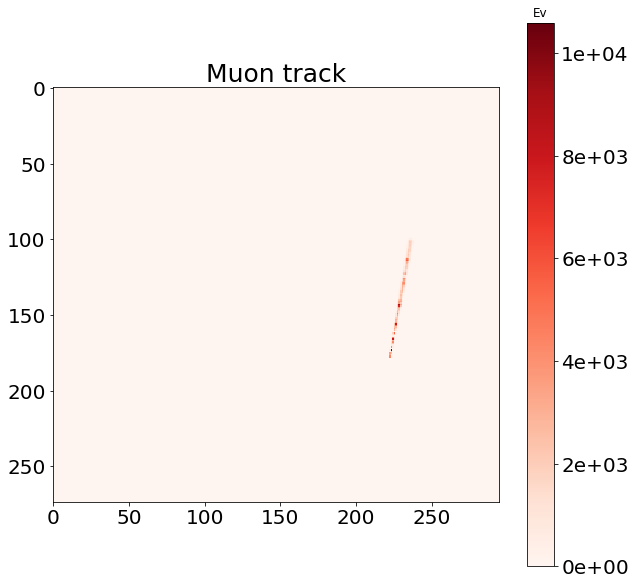

In [10]:
files_cropped = os.listdir(path)
mu = np.load(os.path.join(path, files_cropped[1000]))['energy']
n = np.load(os.path.join(path, files_cropped[1000]))['noise']

fig_mu_c = plt.figure(figsize=(10,10))
plt.imshow(mu, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Muon track", fontsize = 25)

Text(0.5, 1.0, 'Noise')

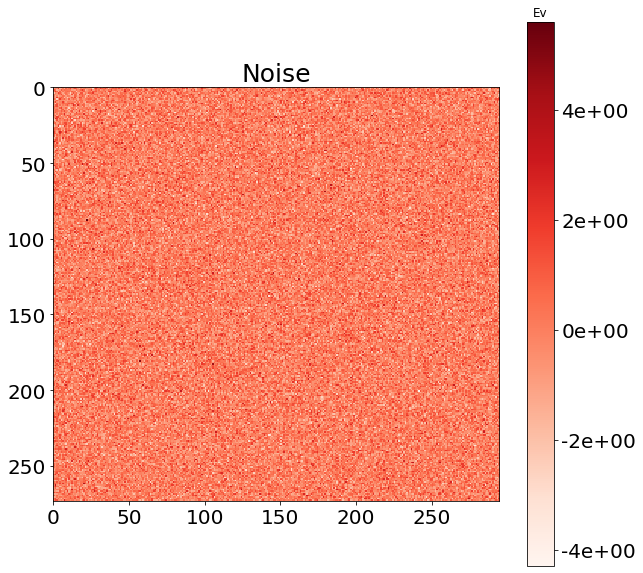

In [11]:
fig_n_c = plt.figure(figsize=(10,10))
plt.imshow(n, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Noise", fontsize = 25)

In [12]:
n.shape

(274, 295)